In [3]:
!git init

Initialized empty Git repository in C:/ImageClassification/Deep_Face_Detection/Face_Detection/.git/


In [5]:
!git add .
!git commit -m "Initial commit"

Auto packing the repository in background for optimum performance.
See "git help gc" for manual housekeeping.


[master (root-commit) 7210ec4] Initial commit
 15545 files changed, 20468 insertions(+)
 create mode 100644 .ipynb_checkpoints/Face_Detection-checkpoint.ipynb
 create mode 100644 Face_Detection.ipynb
 create mode 100644 aug_data/test/images/.ipynb_checkpoints/07698311-5b1f-11ee-bfd2-10f005eed468.0-checkpoint.jpg
 create mode 100644 aug_data/test/images/.ipynb_checkpoints/07698311-5b1f-11ee-bfd2-10f005eed468.10-checkpoint.jpg
 create mode 100644 aug_data/test/images/.ipynb_checkpoints/07698311-5b1f-11ee-bfd2-10f005eed468.14-checkpoint.jpg
 create mode 100644 aug_data/test/images/.ipynb_checkpoints/07698311-5b1f-11ee-bfd2-10f005eed468.2-checkpoint.jpg
 create mode 100644 aug_data/test/images/07698311-5b1f-11ee-bfd2-10f005eed468.0.jpg
 create mode 100644 aug_data/test/images/07698311-5b1f-11ee-bfd2-10f005eed468.1.jpg
 create mode 100644 aug_data/test/images/07698311-5b1f-11ee-bfd2-10f005eed468.10.jpg
 create mode 100644 aug_data/test/images/07698311-5b1f-11ee-bfd2-10f005eed468.11.jpg
 cre

In [6]:
!git remote add origin https://github.com/Abdullah-Taha9/Face_Detection-DeepLearning.git

In [7]:
!git push -u origin master

branch 'master' set up to track 'origin/master'.


remote: warning: See https://gh.io/lfs for more information.        
remote: warning: File facetracker.h5 is 64.24 MB; this is larger than GitHub's recommended maximum file size of 50.00 MB        
remote: warning: GH001: Large files detected. You may want to try Git Large File Storage - https://git-lfs.github.com.        
To https://github.com/Abdullah-Taha9/Face_Detection-DeepLearning.git
 * [new branch]      master -> master


# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [4]:
!pip install labelme opencv-python matplotlib albumentations

  Using cached labelme-5.3.1.tar.gz (1.5 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached opencv_python-4.8.0.76-cp37-abi3-win_amd64.whl (38.1 MB)
  Using cached matplotlib-3.8.0-cp39-cp39-win_amd64.whl (7.6 MB)
  Using cached albumentations-1.3.1-py3-none-any.whl (125 kB)
  Using cached gdown-4.7.1-py3-none-any.whl (15 kB)
  Using cached imgviz-1.7.4-py3-none-any.whl (7.7 MB)
  Using cached natsort-8.4.0-py3-none-any.whl (38 kB)
  Using cached numpy-1.26.0-cp39-cp39-win_amd64.whl (15.8 MB)
  Using cached onnxruntime-1.16.0-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached Pillow-10.0.1-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached PyYAML-6.0.1-cp39-cp39-win_amd64.whl (152 kB)
  Using cached QtPy-2.4.0-py3-none-any.whl (93 kB)
  Using cached scikit_image-0.21.0-cp39-cp39-win_amd64.whl (22.9 MB)
  Using cached kiwisolver-1.4.5-cp39-cp39-win_amd64.whl (56 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
 

You should consider upgrading via the 'C:\ImageClassification\Deep_Face_Detection\f1\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install tensorflow

  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.13.0-cp39-cp39-win_amd64.whl (276.5 MB)
  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached grpcio-1.58.0-cp39-cp39-win_amd64.whl (4.3 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl (440 kB)
  Using cached h5py-3.9.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Using cached numpy-1.24.3-cp39-cp39-win_amd64.whl (14.9 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.4.4-py3-none-any.whl (94 kB)
  Using cached tensorboard_data_server-0.7.1-py3-none-any.whl (2.4 kB)
  Using c

You should consider upgrading via the 'C:\ImageClassification\Deep_Face_Detection\f1\Scripts\python.exe -m pip install --upgrade pip' command.


### 1.2 Collect Images using Opencv

In [3]:
import os
import time
import uuid
import cv2

In [4]:
CurrentPath = os.getcwd()
print('current path: ',CurrentPath)

current path:  C:\ImageClassification\Deep_Face_Detection\Face_Detection


In [8]:
IMAGES_PATH = os.path.join('data','images')
number_images = 10

cap = cv2.VideoCapture(0) #Access Camera # have to be within the for loop because each time we should excute this code when want to take another 30 photo

In [9]:
cap = cv2.VideoCapture(0) #Access Camera
for imgnum in range(number_images):
  print('Collecting image {}'.format(imgnum))
  ret, frame = cap.read()
  imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
  cv2.imwrite(imgname, frame)
  cv2.imshow('frame', frame)
  time.sleep(0.5)

  if cv2.waitKey(1) & 0xFF == ord('q'):
    break
cap.release()
cv2.destroyAllWindows()

### 1.3 Annotate Images with LabelMe

In [26]:
pip install labelme

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ImageClassification\Deep_Face_Detection\f1\Scripts\python.exe -m pip install --upgrade pip' command.


In [28]:
pip install pyqt5

  Using cached PyQt5-5.15.9-cp37-abi3-win_amd64.whl (6.8 MB)
  Using cached PyQt5_sip-12.12.2-cp39-cp39-win_amd64.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ImageClassification\Deep_Face_Detection\f1\Scripts\python.exe -m pip install --upgrade pip' command.


In [31]:
!labelme

[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\DELL\.labelmerc


# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [32]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.2 Load Image into TF Data Pipeline

In [33]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg', shuffle=False)

In [34]:
images.as_numpy_iterator().next()

b'data\\images\\2d1248b1-5bf3-11ee-b3b5-10f005eed468.jpg'

In [35]:
def load_image(x):
    byte_image = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_image)
    return img
    

In [36]:
images = images.map(load_image)

In [37]:
images.as_numpy_iterator().next()

array([[[ 85,  91,  65],
        [ 85,  91,  65],
        [ 82,  90,  66],
        ...,
        [123, 120, 113],
        [124, 121, 114],
        [127, 124, 117]],

       [[ 84,  89,  66],
        [ 84,  89,  66],
        [ 84,  89,  66],
        ...,
        [122, 119, 110],
        [123, 120, 111],
        [125, 122, 113]],

       [[ 84,  87,  66],
        [ 84,  87,  66],
        [ 85,  88,  67],
        ...,
        [121, 119, 106],
        [123, 121, 108],
        [123, 121, 106]],

       ...,

       [[ 21,  28,  21],
        [ 20,  27,  20],
        [ 20,  27,  20],
        ...,
        [ 28,  24,  12],
        [ 30,  26,  14],
        [ 30,  26,  14]],

       [[ 17,  27,  19],
        [ 17,  27,  19],
        [ 20,  27,  20],
        ...,
        [ 27,  23,  12],
        [ 29,  25,  13],
        [ 30,  26,  14]],

       [[ 15,  25,  17],
        [ 16,  26,  18],
        [ 20,  27,  20],
        ...,
        [ 26,  22,  11],
        [ 27,  23,  11],
        [ 27,  23,  11]]

In [38]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### 2.3 View Raw Images with Matplotlib

In [39]:
image_generator = images.batch(4).as_numpy_iterator()

In [40]:
plot_images = image_generator.next()

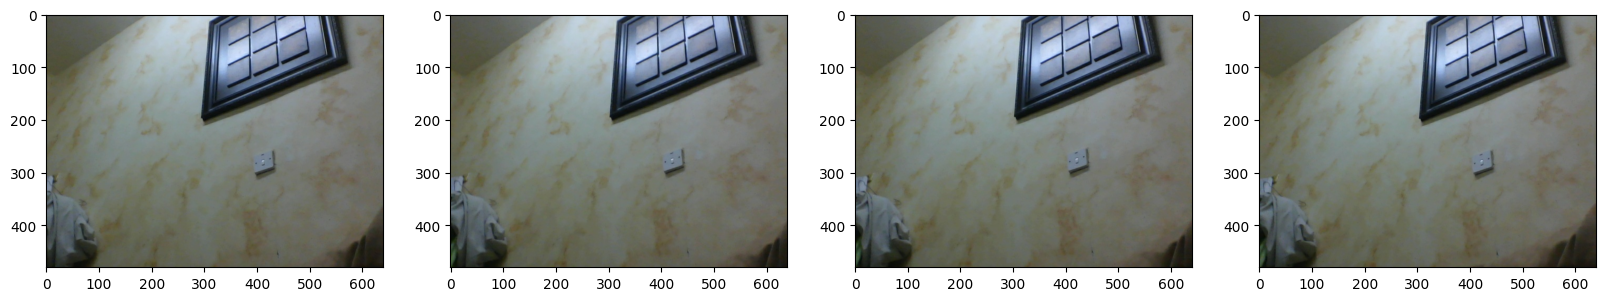

In [41]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

# 3. Partition Unaugmented Data

### 3.1 Manually Split Data into Train, Valdiation and Test

In [99]:
print('train data 70%:', 106*.7, ', valdiation data 20%:',106*.2,', test data 10%:', 106*.1)

train data 70%: 74.19999999999999 , valdiation data 20%: 21.200000000000003 , test data 10%: 10.600000000000001


In [100]:
75 + 21 + 10

106

### 3.2 Move the Matching Labels

The following code will move each image's label from the main labels folder to its corrospending image in the labels folder of either train, val or test

In [42]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

# 4. Apply Augmentation on Images and labels using Albumentation

### 4.1 Setup Albumentations Transform Pipeline

In [43]:
import albumentations as alb

In [30]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [48]:
img = cv2.imread(os.path.join('data', 'train', 'images', '2db632f9-5bf3-11ee-b1ff-10f005eed468.jpg'))

In [49]:
img

In [50]:
with open(os.path.join('data', 'train', 'labels', '2db632f9-5bf3-11ee-b1ff-10f005eed468.json') , 'r') as f:
    label = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'data\\train\\labels\\2db632f9-5bf3-11ee-b1ff-10f005eed468.json'

In [51]:
label

NameError: name 'label' is not defined

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [52]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

NameError: name 'label' is not defined

In [53]:
coords

[0, 0, 0, 0]

In [54]:
coords = list(np.divide(coords, [640,480,640,480]))

In [55]:
coords

[0.0, 0.0, 0.0, 0.0]

### 4.4 Apply Augmentations and View Results

In [56]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

TypeError: image must be numpy array type

In [133]:
augmented

{'image': array([[[ 43,  51,  48],
         [ 42,  50,  47],
         [ 41,  49,  45],
         ...,
         [ 80,  84,  85],
         [ 81,  84,  88],
         [ 81,  86,  89]],
 
        [[ 41,  49,  45],
         [ 41,  49,  45],
         [ 40,  48,  44],
         ...,
         [ 80,  85,  86],
         [ 84,  89,  92],
         [ 82,  89,  92]],
 
        [[ 42,  48,  45],
         [ 41,  47,  44],
         [ 40,  45,  43],
         ...,
         [ 82,  87,  88],
         [ 84,  89,  92],
         [ 82,  89,  92]],
 
        ...,
 
        [[118, 117,  97],
         [120, 119,  99],
         [109, 105,  87],
         ...,
         [ 40,  40,  40],
         [ 42,  42,  42],
         [ 42,  42,  42]],
 
        [[121, 121, 103],
         [112, 112,  94],
         [106, 103,  88],
         ...,
         [ 48,  42,  41],
         [ 47,  41,  42],
         [ 44,  42,  42]],
 
        [[133, 133, 115],
         [109, 109,  91],
         [105, 102,  87],
         ...,
         [ 54,  43,

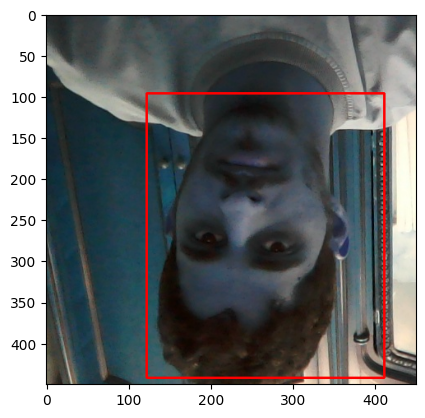

In [134]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)),
              (255,0,0), 2)
plt.imshow(augmented['image'])

 # 5. Build and Run Augmentation Pipeline (Through all images)

### 5.1 Run Augmentation Pipeline

 Step 5 is like 4 however, in 4 we did that on one image only

In [57]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

### 5.2 Load Augmented Images to Tensorflow Dataset

In [136]:
train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [137]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [138]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [139]:
train_images.as_numpy_iterator().next()

array([[[0.50919116, 0.60036767, 0.64889705],
        [0.5636029 , 0.6332108 , 0.68762255],
        [0.59816176, 0.67561275, 0.7088235 ],
        ...,
        [0.41403186, 0.37922794, 0.25520834],
        [0.42383578, 0.39460784, 0.23560049],
        [0.42892158, 0.39846814, 0.24387255]],

       [[0.5189951 , 0.6038603 , 0.6389706 ],
        [0.56464463, 0.6351716 , 0.6729779 ],
        [0.58639705, 0.6530637 , 0.6805147 ],
        ...,
        [0.4163603 , 0.38498774, 0.24276961],
        [0.42352942, 0.39215687, 0.2504902 ],
        [0.42518383, 0.3872549 , 0.25012255]],

       [[0.5609069 , 0.63915443, 0.63933825],
        [0.6404412 , 0.72181374, 0.74240196],
        [0.70827204, 0.7646446 , 0.79944855],
        ...,
        [0.4043505 , 0.38866422, 0.20533088],
        [0.4122549 , 0.38480392, 0.2122549 ],
        [0.41715688, 0.38186276, 0.22340687]],

       ...,

       [[0.37628677, 0.3841299 , 0.3384191 ],
        [0.46072304, 0.47591913, 0.42248774],
        [0.52156866, 0

# 6. Prepare Labels

### 6.2 Load Label and Image Samples

In [140]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [154]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [155]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [156]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [157]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.312 , 0.    , 0.8564, 0.691 ], dtype=float16))

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

Initially we have only 106 images, however now we have:

In [161]:
print('Training Data Set(imgs, labels):', len(train_images), len(train_labels)) , print('Validation Data Set(imgs, labels):',len(val_images), len(val_labels)), print('Testing Data Set(imgs, labels):',len(test_images), len(test_labels))

Training Data Set(imgs, labels): 4500 4500
Validation Data Set(imgs, labels): 1260 1260
Testing Data Set(imgs, labels): 600 600


(None, None, None)

### 7.2 Creat Final Datasets (Images/Labels)

In [162]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(6000)
train = train.batch(8)
train = train.prefetch(4)

In [163]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1500)
val = val.batch(8)
val = val.prefetch(4)

In [164]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(900)
test = test.batch(8)
test = test.prefetch(4)

In [166]:
train.as_numpy_iterator().next()

(array([[[[0.4464461 , 0.3716299 , 0.43480393],
          [0.40465686, 0.32095587, 0.3680147 ],
          [0.41764706, 0.33382353, 0.3735294 ],
          ...,
          [0.23204657, 0.16930147, 0.21243873],
          [0.23645833, 0.17371324, 0.22469363],
          [0.2485294 , 0.19068627, 0.2447304 ]],
 
         [[0.4392157 , 0.36531863, 0.4503064 ],
          [0.4353554 , 0.3542892 , 0.41954657],
          [0.41623774, 0.33780637, 0.3848652 ],
          ...,
          [0.24705882, 0.1764706 , 0.22352941],
          [0.24270834, 0.17996323, 0.22996323],
          [0.25030637, 0.18694852, 0.2372549 ]],
 
         [[0.4233456 , 0.3606005 , 0.40257353],
          [0.43278188, 0.36568627, 0.4057598 ],
          [0.42303923, 0.35637254, 0.39558825],
          ...,
          [0.2538603 , 0.18719363, 0.22640932],
          [0.24705882, 0.18431373, 0.22745098],
          [0.25208333, 0.18688725, 0.22757353]],
 
         ...,
 
         [[0.6745711 , 0.6449755 , 0.68167895],
          [0.26611

In [167]:
val.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

In [169]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.514 , 0.    , 1.    , 0.632 ],
        [0.3096, 0.    , 0.9214, 0.6025],
        [0.    , 0.3843, 0.533 , 1.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.1686, 0.3167, 0.7515, 1.    ],
        [0.2966, 0.339 , 0.8955, 1.    ],
        [0.55  , 0.    , 1.    , 0.7085],
        [0.0734, 0.    , 0.697 , 0.694 ]], dtype=float16))

### 7.3 View Images and Annotations

In [172]:
data_samples = train.as_numpy_iterator()

In [177]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


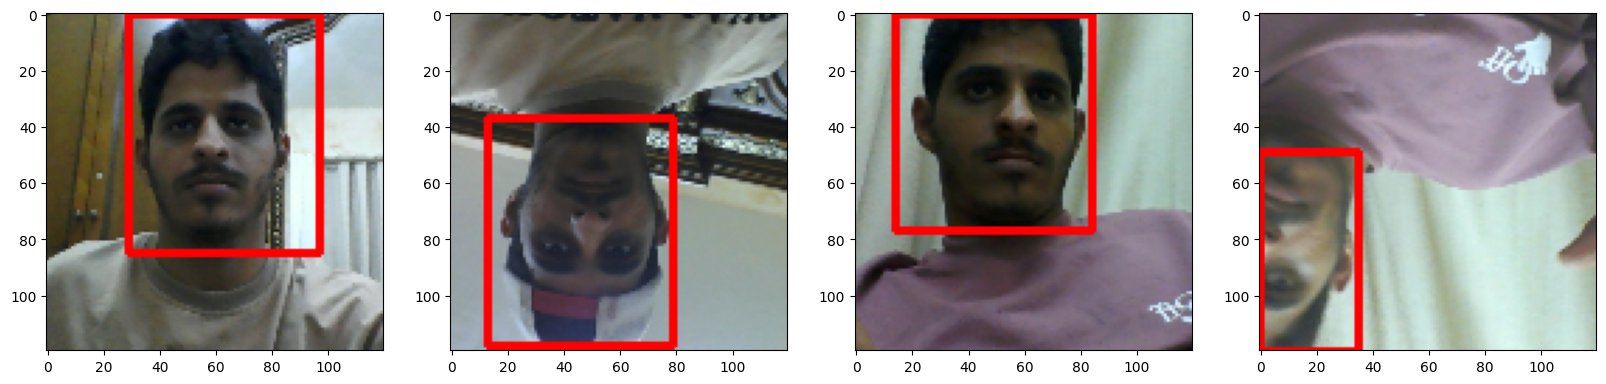

In [178]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)

# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [64]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [65]:
vgg =VGG16(include_top=False)

In [66]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### 8.3 Build instance of Network

In [67]:
def build_model():
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)
    
    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker
    


### 8.4 Test out Neural Network

In [68]:
facetracker = build_model()

In [69]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [70]:
x, y = train.as_numpy_iterator().next()

NameError: name 'train' is not defined

In [206]:
y

(array([[1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[0.39    , 0.2306  , 1.      , 1.      ],
        [0.013725, 0.      , 0.5483  , 0.6533  ],
        [0.      , 0.      , 0.586   , 0.6484  ],
        [0.      , 0.      , 0.      , 0.      ],
        [0.      , 0.      , 0.      , 0.      ],
        [0.2257  , 0.      , 0.8193  , 0.6177  ],
        [0.528   , 0.2418  , 1.      , 1.      ],
        [0.2269  , 0.0053  , 0.8086  , 0.7427  ]], dtype=float16))

In [208]:
x.shape

(8, 120, 120, 3)

In [209]:
classes, coords = facetracker.predict(x)

1/1 [==============================] - 1s 623ms/step


In [210]:
classes, coords

(array([[0.39501297],
        [0.5154105 ],
        [0.46927947],
        [0.42993957],
        [0.43206504],
        [0.4436415 ],
        [0.48797053],
        [0.4328178 ]], dtype=float32),
 array([[0.2639742 , 0.43827727, 0.40396884, 0.62041605],
        [0.31846574, 0.44153687, 0.38790724, 0.5843807 ],
        [0.28460243, 0.38635325, 0.39983368, 0.49050036],
        [0.29853883, 0.3970991 , 0.38336432, 0.557974  ],
        [0.32608557, 0.36560416, 0.41955808, 0.48596415],
        [0.2978408 , 0.37087458, 0.38517824, 0.5617432 ],
        [0.28774044, 0.46793723, 0.41203687, 0.5812724 ],
        [0.32790917, 0.4421823 , 0.40661997, 0.5248947 ]], dtype=float32))

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [228]:
import tensorflow as tf

In [219]:
len(train)

563

In [253]:
batches_per_epoch = len(train)
lr_decay = (1.0/0.75 -1) / batches_per_epoch

In [254]:
lr_decay

0.0005920663114268797

opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=0.0007168458781362006) #did not work

In [255]:
opt = tf.keras.optimizers.Adam(learning_rate=lambda: 0.0001 * lr_decay)

or use this:

In [248]:
batches_per_epoch = len(train)
lr_decay = (1.0 / 0.75 - 1.0) / batches_per_epoch
initial_learning_rate = 0.0001
learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,  # Adjust decay_steps as needed
    decay_rate=0.1,  # Adjust decay_rate as needed
    staircase=True
)

opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

### 9.2 Create Localization Loss and Classification Loss

In [249]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [250]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [251]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.7908254>

In [ ]:
classloss(y[0], classes)

In [252]:
regressloss(y[1], coords).numpy()

4.7908254

In [256]:
classloss(y[0], classes).numpy()

0.7304527

# 10. Train Neural Network

In [257]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [258]:
model = FaceTracker(facetracker)

In [259]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [260]:
logdir='logs'

In [261]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [262]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
563/563 [==============================] - 1183s 2s/step - total_loss: 3.5602 - class_loss: 0.7099 - regress_loss: 3.2052 - val_total_loss: 1.5065 - val_class_loss: 0.7023 - val_regress_loss: 1.1554
Epoch 2/10
563/563 [==============================] - 1068s 2s/step - total_loss: 1.7883 - class_loss: 0.5521 - regress_loss: 1.5123 - val_total_loss: 0.6593 - val_class_loss: 0.4551 - val_regress_loss: 0.4318
Epoch 3/10
563/563 [==============================] - 1049s 2s/step - total_loss: 1.1782 - class_loss: 0.4100 - regress_loss: 0.9731 - val_total_loss: 0.6150 - val_class_loss: 0.3461 - val_regress_loss: 0.4419
Epoch 4/10
563/563 [==============================] - 1017s 2s/step - total_loss: 0.9933 - class_loss: 0.3172 - regress_loss: 0.8346 - val_total_loss: 0.4482 - val_class_loss: 0.1540 - val_regress_loss: 0.3712
Epoch 5/10
563/563 [==============================] - 1785s 3s/step - total_loss: 0.8852 - class_loss: 0.2595 - regress_loss: 0.7555 - val_total_loss: 0.2359 - 

### 10.3 Plot Performance

In [263]:
hist.history

{'total_loss': [1.0545941591262817,
  0.4812900722026825,
  0.5939371585845947,
  0.46968868374824524,
  0.5513720512390137,
  0.2704941928386688,
  0.4729965329170227,
  0.275907427072525,
  0.10333964228630066,
  0.13171471655368805],
 'class_loss': [0.6614375710487366,
  0.5037075281143188,
  0.3007163405418396,
  0.19852684438228607,
  0.2250603884458542,
  0.09776829183101654,
  0.263509601354599,
  0.056006625294685364,
  0.037092067301273346,
  0.03140722215175629],
 'regress_loss': [0.7238753437995911,
  0.22943630814552307,
  0.44357895851135254,
  0.3704252541065216,
  0.43884187936782837,
  0.22161003947257996,
  0.341241717338562,
  0.24790412187576294,
  0.08479361236095428,
  0.1160111054778099],
 'val_total_loss': [1.5065137147903442,
  0.6593070030212402,
  0.6149892807006836,
  0.4481792449951172,
  0.23593106865882874,
  0.19141194224357605,
  0.5917356014251709,
  0.5213260054588318,
  1.1889830827713013,
  0.4784869849681854],
 'val_class_loss': [0.7022746205329895,

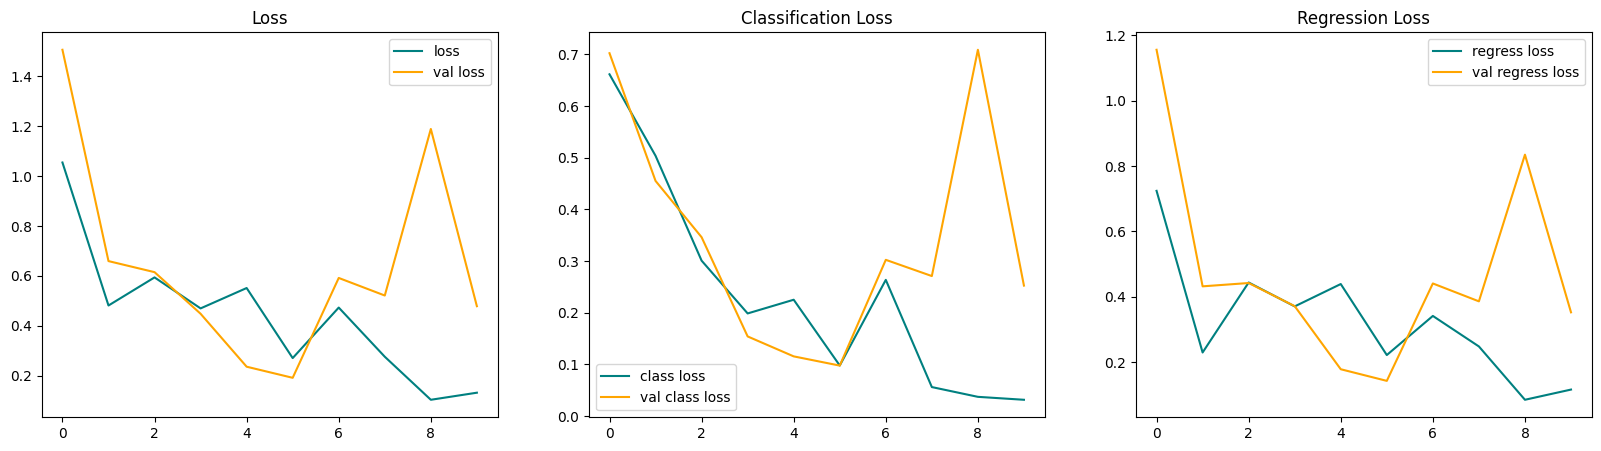

In [264]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [404]:
test_data = test.as_numpy_iterator()

In [423]:
test_sample = test_data.next()

In [424]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 452ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


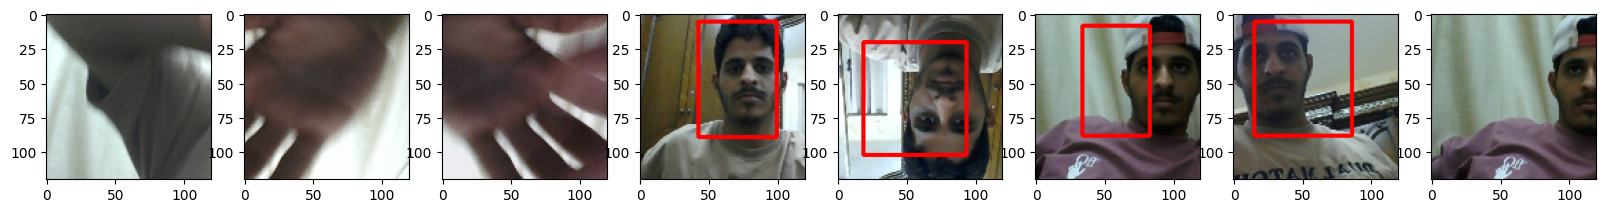

In [425]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx in range(8): 
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### 11.2 Save the Model

In [59]:
from tensorflow.keras.models import load_model
import cv2
import tensorflow as tf
import numpy as np

In [60]:
facetracker.save('facetracker.h5')

NameError: name 'facetracker' is not defined

In [3]:
facetracker = load_model('facetracker.h5')

### 11.3 Real Time Detection

In [71]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
quit()

1/1 [==============================] - 0s 56ms/step
